<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/pandas/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Series

1D

labeled 

In [3]:
A = pd.Series([1,2,3,4], index = ['a', 'b', 'c', 'd']) # explicit
A

a    1
b    2
c    3
d    4
dtype: int64

In [8]:
print(A.values)
type(A.values)

[1 2 3 4]


numpy.ndarray

In [20]:
print(A.index)
type(A.index)

Index(['a', 'b', 'c', 'd'], dtype='object')


pandas.core.indexes.base.Index

In [14]:
B = pd.Series([1,2,3,4])

In [17]:
print(B.values)
print(type(B.values))
print(B.index)
print(type(B.index))

[1 2 3 4]
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=4, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


## Slicing



*   Implicit index  iloc [start: end) 
*   Explicit index  loc [start: end]



In [23]:
A['a':'c']  # A.loc['a': 'c']

a    1
b    2
c    3
dtype: int64

In [26]:
A[0:2]  # A.iloc[0:2]
# A.iloc[0:2]

a    1
b    2
dtype: int64

In [27]:
C = pd.Series([1,2,3,4], index = [1, 4, 2, 7]) # explicit
C

1    1
4    2
2    3
7    4
dtype: int64

In [35]:
C.iloc[0:2]

1    1
4    2
dtype: int64

## Creating from dict

In [36]:
heightd = {'A': 5.5, 'B':5.8, 'C':6.2}

height = pd.Series(heightd)
height

A    5.5
B    5.8
C    6.2
dtype: float64

In [39]:
weightd = {'A': 48, 'B':50, 'C':69}

weight = pd.Series(weightd)
weight

A    48
B    50
C    69
dtype: int64

# DataFrame

2D



*   row indexing -> index
*   column indexing -> columns



In [50]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [51]:
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [53]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [55]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [61]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]], index = ['r1', 'r2', 'r3', 'r4'], columns = ['c1', 'c2', 'c3'])
df

,c1,c2,c3
r1,1,2,3
r2,4,5,6
r3,7,8,9
r4,10,11,12


In [83]:
df = pd.DataFrame({
    'Height': height,
    'Weight': weight,
})
df

,Height,Weight
A,5.5,48
B,5.8,50
C,6.2,69


In [65]:
print(df.index)
print(df.columns)

Index(['A', 'B', 'C'], dtype='object')
Index(['Height', 'Weight'], dtype='object')


In [68]:
print(type(df['Height']))
df['Height']

<class 'pandas.core.series.Series'>


A    5.5
B    5.8
C    6.2
Name: Height, dtype: float64

In [84]:
print(type(df.loc['B':'C']))
print(df.iloc[1])
df.loc['B':'C']

<class 'pandas.core.frame.DataFrame'>
Height     5.8
Weight    50.0
Name: B, dtype: float64


,Height,Weight
B,5.8,50
C,6.2,69


## Indexing Slicing

df[column]
df[ [col1, col2, col3] ]

df[ [true, false, false,] ]  => works in row

df[ df['Height'] > 5 ]

In [91]:
df[ ['Height', 'Weight'] ]

,Height,Weight
A,5.5,48
B,5.8,50
C,6.2,69


In [92]:
df[ [True, False, True] ]

,Height,Weight
A,5.5,48
C,6.2,69


In [96]:
df[ df['Height'] > 5.5 ]

,Height,Weight
B,5.8,50
C,6.2,69


## Columns Operations

inplace = True  same dataframe gets updated

In [101]:
df['Height_CM'] = df['Height'] * 30.48
df

,Height,Weight,Height_CM
A,5.5,48,167.640
B,5.8,50,176.784
C,6.2,69,188.976


In [106]:
# del df['Height_CM']
df.drop(columns = ['Height_CM'], index = ['A'], inplace = True)

In [107]:
df

,Height,Weight
B,5.8,50
C,6.2,69


In [111]:
df = pd.DataFrame({
    'Height': height,
    'Weight': weight,
})
df

,Height,Weight
A,5.5,48
B,5.8,50
C,6.2,69


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3 non-null      float64
 1   Weight  3 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 152.0+ bytes


In [114]:
df.head(2)

,Height,Weight
A,5.5,48
B,5.8,50


In [115]:
df.tail(2)

,Height,Weight
B,5.8,50
C,6.2,69


In [116]:
df.describe()

,Height,Weight
count,3.000000,3.000000
mean,5.833333,55.666667
std,0.351188,11.590226
min,5.500000,48.000000
25%,5.650000,49.000000
50%,5.800000,50.000000
75%,6.000000,59.500000
max,6.200000,69.000000


## Missing Data

In [124]:
df = pd.DataFrame({
    'Height': {'A': 48, 'C':69},
    'Weight': {'B':5.8, 'C':6.2},
    'Age': {'A': 10, 'B':15, 'C':12}
})
df

,Height,Weight,Age
A,48.0,NaN,10
C,69.0,6.2,12
B,NaN,5.8,15


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  2 non-null      float64
 1   Weight  2 non-null      float64
 2   Age     3 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 96.0+ bytes




*   row    `df.dropna(axis = 0)`
*   column `df.dropna(axis = 1)`
*   fillna    `df['Height'].fillna(df['Height'].mean())`



In [131]:
df.dropna(axis = 1)

,Age
A,10
C,12
B,15


In [141]:
df['Height'].fillna(df['Height'].mean(), inplace = True)

pandas.core.series.Series

In [133]:
df

,Height,Weight,Age
A,48.0,NaN,10
C,69.0,6.2,12
B,58.5,5.8,15


In [144]:
df.loc['A'].fillna(30, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [137]:
df

,Height,Weight,Age
A,48.0,NaN,10
C,69.0,6.2,12
B,58.5,5.8,15


# DataSet

In [145]:
df = pd.read_csv('https://raw.githubusercontent.com/neylsoncrepalde/projeto_eda_covid/master/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              26713 non-null  int64  
 1   ObservationDate  26713 non-null  object 
 2   Province/State   12882 non-null  object 
 3   Country/Region   26713 non-null  object 
 4   Last Update      26713 non-null  object 
 5   Confirmed        26713 non-null  float64
 6   Deaths           26713 non-null  float64
 7   Recovered        26713 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [147]:
df.shape

(26713, 8)

In [149]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,26713.000000,26713.000000,26713.000000,26713.000000
mean,13357.000000,5690.647550,373.353236,1736.979224
std,7711.523207,23417.369124,2214.074387,10864.727709
min,1.000000,0.000000,0.000000,0.000000
25%,6679.000000,18.000000,0.000000,0.000000
50%,13357.000000,192.000000,3.000000,8.000000
75%,20035.000000,1350.000000,28.000000,187.000000
max,26713.000000,352845.000000,35341.000000,289392.000000


In [150]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,05/19/2020,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,05/19/2020,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,05/19/2020,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,05/19/2020,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [152]:
df.drop(columns = ['SNo', 'Last Update'], inplace = True)
df

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
26708,05/19/2020,Wyoming,US,776.0,10.0,0.0
26709,05/19/2020,Xinjiang,Mainland China,76.0,3.0,73.0
26710,05/19/2020,Yukon,Canada,11.0,0.0,11.0
26711,05/19/2020,Yunnan,Mainland China,185.0,2.0,183.0


In [156]:
df.rename(columns = {'Province/State' : 'State', 'Country/Region': 'Country'}, inplace = True)
df

,ObservationDate,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
26708,05/19/2020,Wyoming,US,776.0,10.0,0.0
26709,05/19/2020,Xinjiang,Mainland China,76.0,3.0,73.0
26710,05/19/2020,Yukon,Canada,11.0,0.0,11.0
26711,05/19/2020,Yunnan,Mainland China,185.0,2.0,183.0


In [169]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  26713 non-null  datetime64[ns]
 1   State            12882 non-null  object        
 2   Country          26713 non-null  object        
 3   Confirmed        26713 non-null  float64       
 4   Deaths           26713 non-null  float64       
 5   Recovered        26713 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.2+ MB


In [170]:
df.head()

,ObservationDate,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [177]:
max = df['Confirmed'].max()
max

352845.0

In [179]:
df[ df['Confirmed'] == max ]

,ObservationDate,State,Country,Confirmed,Deaths,Recovered
26638,2020-05-19,New York,US,352845.0,28558.0,0.0


In [193]:
df.groupby('Country').sum()

,Confirmed,Deaths,Recovered
Country,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,115615.0,3211.0,13641.0
Albania,34319.0,1408.0,20212.0
Algeria,183263.0,19089.0,76184.0
...,...,...,...
Western Sahara,256.0,0.0,144.0
Yemen,1190.0,190.0,30.0
Zambia,8987.0,166.0,3102.0


In [194]:
df.groupby('Country').sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,115615.0,3211.0,13641.0
3,Albania,34319.0,1408.0,20212.0
4,Algeria,183263.0,19089.0,76184.0
...,...,...,...,...
218,Western Sahara,256.0,0.0,144.0
219,Yemen,1190.0,190.0,30.0
220,Zambia,8987.0,166.0,3102.0
221,Zimbabwe,1386.0,171.0,226.0


In [201]:
CG = df.groupby('Country')[ ['Confirmed', 'Deaths'] ].sum().reset_index()
CG

,Country,Confirmed,Deaths
0,Azerbaijan,1.0,0.0
1,"('St. Martin',)",2.0,0.0
2,Afghanistan,115615.0,3211.0
3,Albania,34319.0,1408.0
4,Algeria,183263.0,19089.0
...,...,...,...
218,Western Sahara,256.0,0.0
219,Yemen,1190.0,190.0
220,Zambia,8987.0,166.0
221,Zimbabwe,1386.0,171.0


In [205]:
CG[CG['Confirmed'] == CG['Confirmed'].max()]

,Country,Confirmed,Deaths
208,US,45753141.0,2483481.0


In [206]:
COG = df.groupby(['Country', 'ObservationDate'])[ ['Confirmed', 'Deaths'] ].sum().reset_index()
COG

,Country,ObservationDate,Confirmed,Deaths
0,Azerbaijan,2020-02-28,1.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0
...,...,...,...,...
14696,occupied Palestinian territory,2020-03-12,0.0,0.0
14697,occupied Palestinian territory,2020-03-14,0.0,0.0
14698,occupied Palestinian territory,2020-03-15,0.0,0.0
14699,occupied Palestinian territory,2020-03-16,0.0,0.0


In [207]:
df.columns

Index(['ObservationDate', 'State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [210]:
A = df[ ['ObservationDate', 'State', 'Country'] ]
A.head()

,ObservationDate,State,Country
0,2020-01-22,Anhui,Mainland China
1,2020-01-22,Beijing,Mainland China
2,2020-01-22,Chongqing,Mainland China
3,2020-01-22,Fujian,Mainland China
4,2020-01-22,Gansu,Mainland China


In [211]:
B = df[ ['Confirmed', 'Deaths','Recovered'] ]
B.head()

,Confirmed,Deaths,Recovered
0,1.0,0.0,0.0
1,14.0,0.0,0.0
2,6.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


In [214]:
A.merge(B, left_index=True, right_index=True)

,ObservationDate,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
26708,2020-05-19,Wyoming,US,776.0,10.0,0.0
26709,2020-05-19,Xinjiang,Mainland China,76.0,3.0,73.0
26710,2020-05-19,Yukon,Canada,11.0,0.0,11.0
26711,2020-05-19,Yunnan,Mainland China,185.0,2.0,183.0


In [215]:
A.join(B)

,ObservationDate,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
26708,2020-05-19,Wyoming,US,776.0,10.0,0.0
26709,2020-05-19,Xinjiang,Mainland China,76.0,3.0,73.0
26710,2020-05-19,Yukon,Canada,11.0,0.0,11.0
26711,2020-05-19,Yunnan,Mainland China,185.0,2.0,183.0


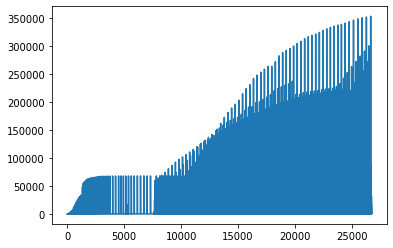

In [220]:
df['Confirmed'].plot()

In [225]:
df['Country'].value_counts()

US                     4990
Mainland China         3687
Canada                 1093
Australia               788
France                  752
                       ... 
Republic of Ireland       1
Cape Verde                1
St. Martin                1
East Timor                1
North Ireland             1
Name: Country, Length: 223, dtype: int64